In [1]:
# Breast cancer detection using CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# reading data sets using pandas
df=pd.read_csv(r'C:\Users\pritam\Desktop\breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Checking the shape of the data
df.shape

(569, 33)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Dropping unnecessary column
df2=df.drop(columns=["Unnamed: 32",'id'])

In [9]:
# checking the structure of the data
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# info of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
# Encoding the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df2.iloc[:,0]=labelencoder_Y.fit_transform(df2.iloc[:,0].values)

In [12]:
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Get the count of the malignant and benign
df2['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

C:\Users\pritam\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

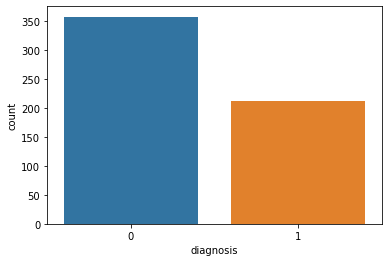

In [14]:
# lets create the counterplot 
sns.countplot(df2['diagnosis'],label="Count")

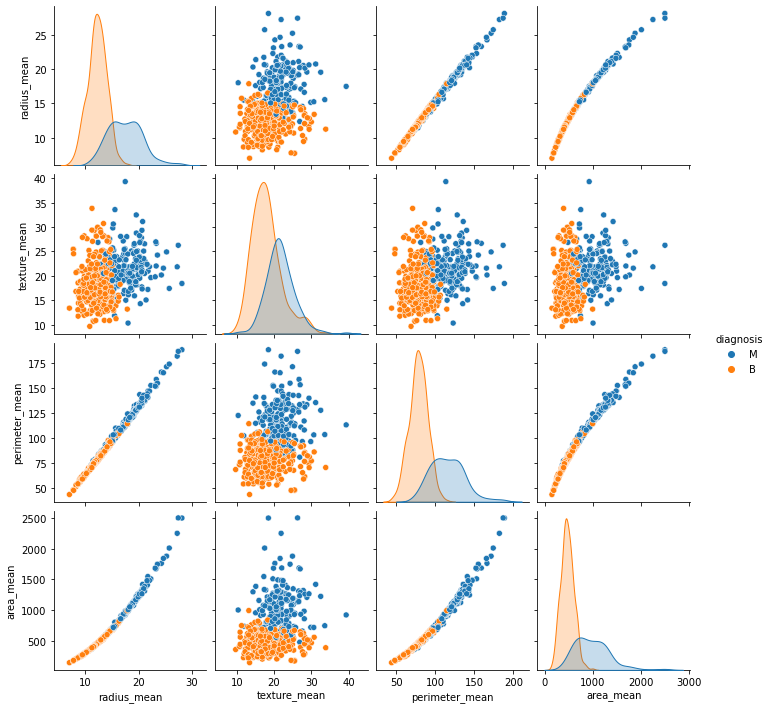

In [15]:
# lets create the pairplot
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

<AxesSubplot:title={'center':'Correlation Matrix'}>

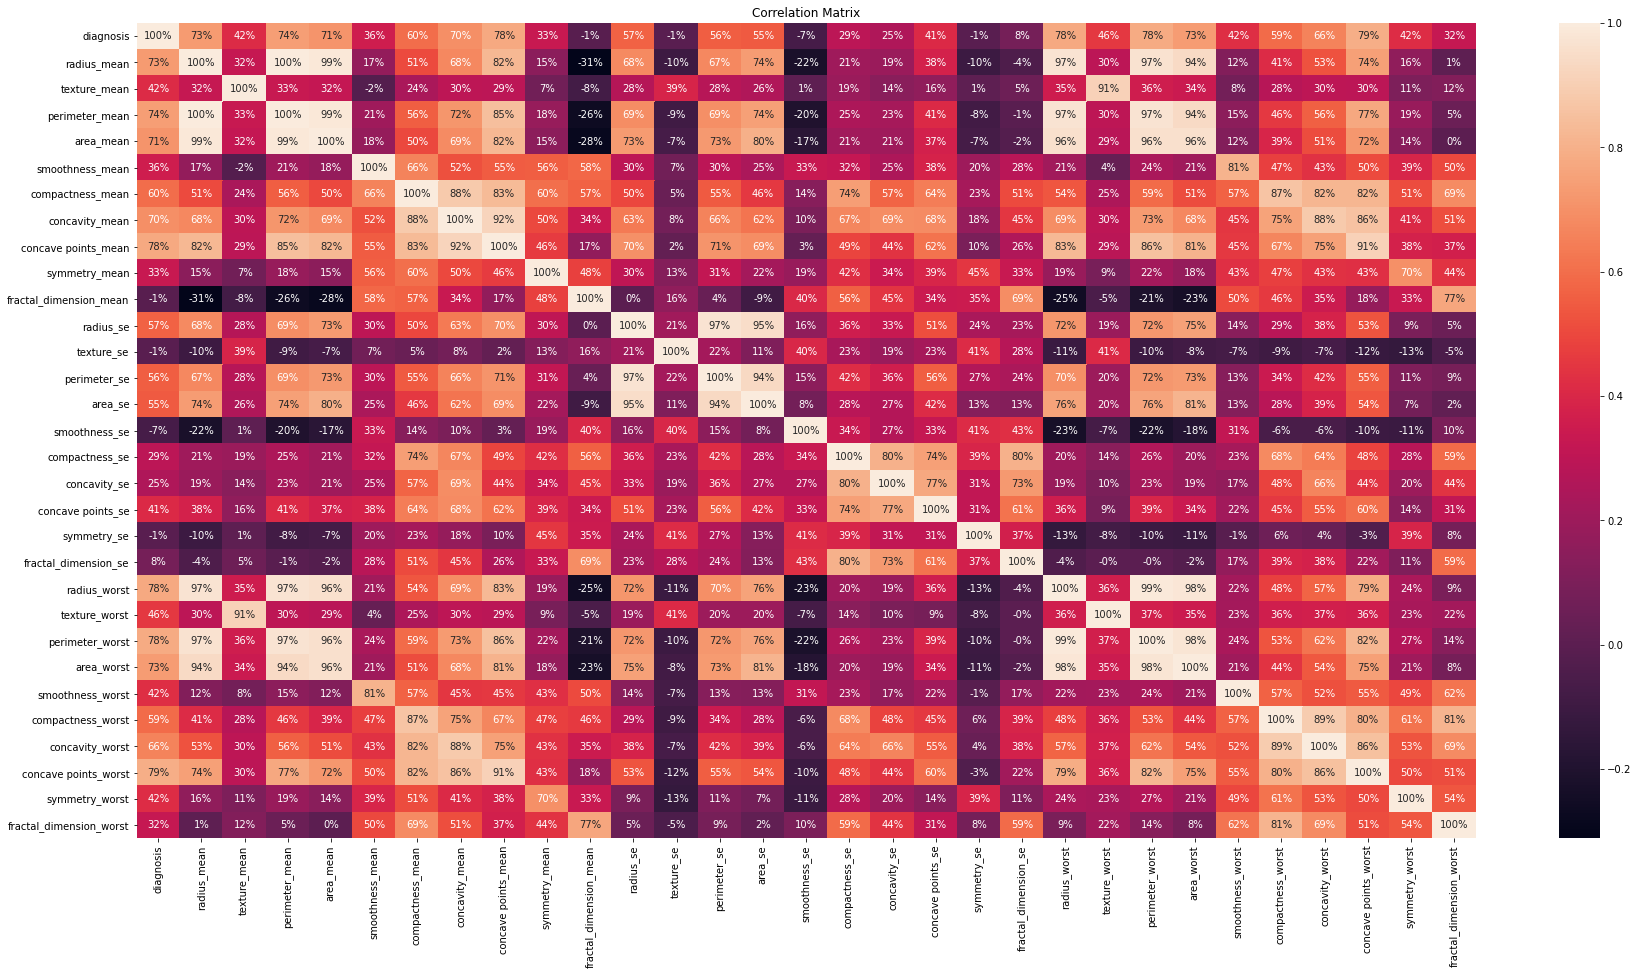

In [16]:
# creating the correlation matric
plt.figure(figsize=(30,15))
plt.title("Correlation Matrix")
sns.heatmap(df2.corr(),annot=True,fmt=".0%")

In [17]:
X=df2.drop(columns="diagnosis")

In [18]:
Y=df2['diagnosis']

In [19]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [21]:
#checking shape
X.shape

(569, 30)

In [22]:
Y.shape

(569,)

In [23]:
# spliting datasets into training and testing datasets
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.1,random_state=0)

In [24]:
# checking shape
X_train.shape

(512, 30)

In [25]:
# checking shape
y_test.shape

(57,)

In [26]:
# applying standardScalar for standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Creating model
def Model(x,y):
    # for logistic regression model
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x,y)
    
    # For decision tree
    from sklearn.tree import DecisionTreeClassifier
    des=DecisionTreeClassifier(criterion="entropy",random_state=0)
    des.fit(x,y)
    # for random forest
    from sklearn.ensemble import RandomForestClassifier
    ran=RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
    ran.fit(x,y)
    
    #printing output
    print("[0] Logistic Regression Training Accuracy:",log.score(x,y))
    print("[1] Decision Tree Training Accuracy:",des.score(x,y))
    print("[2] Random Forest Training Accuracy:",ran.score(x,y))    
    return log,des,ran

In [28]:
# getting all the models
model=Model(X_train,y_train)

[0] Logistic Regression Training Accuracy: 0.986328125
[1] Decision Tree Training Accuracy: 1.0
[2] Random Forest Training Accuracy: 0.99609375


In [29]:
# getting matrix of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# using for loop
for i in range(len(model)):
    print("Model",i)
    print(classification_report(y_test,model[i].predict(X_test)))
    print(accuracy_score(y_test,model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

1.0
Model 1
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        35
           1       0.84      0.95      0.89        22

    accuracy                           0.91        57
   macro avg       0.90      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57

0.9122807017543859
Model 2
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.87      0.91      0.89        22

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91    

In [36]:
#create a pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
pipe=Pipeline([('classifier',RandomForestClassifier())])

In [38]:
# creating dictionary for hyperparameter tuning
grid_param=[
            {'classifier':[LogisticRegression()],
             'classifier__penalty':['l2','l1'],
             'classifier__C':np.logspace(0,4,10)
    
            },
            {'classifier':[RandomForestClassifier()],
             'classifier__n_estimators':[10,100,1000],
             'classifier__max_depth':[5,8,15,25,30,None],
             'classifier__min_samples_leaf':[1,2,5,10,15,100],
             'classifier__max_leaf_nodes':[2,5,10]
             
             
    
            }]

In [41]:
# creating gridsearch of the pipeline to fit the best model
gridsearch=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model=gridsearch.fit(X_train,y_train)

C:\Users\pritam\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.97458595        nan 0.96291643        nan 0.9590139         nan
 0.95903293        nan 0.95707215        nan 0.95316962        nan
 0.95122787        nan 0.94926709        nan 0.9473063         nan
 0.9473063         nan 0.92385304 0.92381496 0.92185418 0.92381496
 0.91793261 0.923834   0.92579478 0.9160099  0.92379593 0.91403008
 0.92187322 0.92185418 0.91985532 0.91989339 0.92575671 0.90814773
 0.90822387 0.9121264  0.95309347 0.94723015 0.94723015 0.92967828
 0.94919094 0.95113269 0.94919094 0.95309347 0.95113269 0.93363792
 0.94526937 0.9491719  0.93359985 0.94528841 0.94136684 0.90622501
 0.91408719 0.9121264  0.93942509 0.95701504 0.95113269 0.95117076
 0.94724919 0.95309347 0.94138587 0.95507329 0.9491719  0.94721112
 0.94526937 0.94723015 0.94136684 0.94332762 0.94526937 0.91205026
 0.91014658 0.91408719 0.92371978 0.92183514

In [42]:
best_model.cv_results_

{'mean_fit_time': array([2.81869888e-02, 2.40039825e-03, 3.83733273e-02, 1.40042305e-03,
        6.61607265e-02, 2.79836655e-03, 1.02544641e-01, 1.99670792e-03,
        1.05139494e-01, 1.99823380e-03, 1.19331646e-01, 1.39985085e-03,
        1.00940990e-01, 1.79753304e-03, 1.14533806e-01, 1.79567337e-03,
        1.11537790e-01, 5.19723892e-03, 1.07139635e-01, 1.59783363e-03,
        7.69560814e-02, 6.16647959e-01, 5.64850359e+00, 5.51700115e-02,
        4.91321754e-01, 5.53557205e+00, 6.35632515e-02, 4.52538872e-01,
        4.71351771e+00, 4.85721588e-02, 4.46544790e-01, 4.91939263e+00,
        4.27754879e-02, 4.17963076e-01, 5.45288944e+00, 4.45737839e-02,
        4.58337927e-01, 5.83704090e+00, 6.87593460e-02, 7.53675365e-01,
        6.08606167e+00, 5.21706581e-02, 5.10108948e-01, 6.19746284e+00,
        7.27576256e-02, 6.30240583e-01, 5.29957557e+00, 4.25753593e-02,
        4.64934587e-01, 5.80588665e+00, 5.25703430e-02, 4.56139278e-01,
        5.41671381e+00, 4.81721878e-02, 4.36355

In [43]:
# checking best score and best_params
best_model.best_score_,best_model.best_params_

(0.9745859508852085,
 {'classifier': LogisticRegression(),
  'classifier__C': 1.0,
  'classifier__penalty': 'l2'})

In [45]:
# best_estimator
best_model.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression())])

In [46]:
# reshaping the datset to 3-d to pass through the CNN
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

In [47]:
# preparing the model
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(16,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [48]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 16)            48        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 29, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 16)            528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 16)            64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 448)               0

In [49]:
#model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:

#model.fit(X_train,y_train,batch_size=10, epochs=20)

In [51]:
# checking history
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 42s 379ms/step - loss: 0.9083 - accuracy: 0.5537 - val_loss: 0.6659 - val_accuracy: 0.7193
Epoch 2/35
16/16 [==============================] - 0s 16ms/step - loss: 0.7383 - accuracy: 0.6550 - val_loss: 0.6437 - val_accuracy: 0.8421
Epoch 3/35
16/16 [==============================] - 0s 11ms/step - loss: 0.6193 - accuracy: 0.6935 - val_loss: 0.6170 - val_accuracy: 0.8596
Epoch 4/35
16/16 [==============================] - 0s 12ms/step - loss: 0.4946 - accuracy: 0.7672 - val_loss: 0.5883 - val_accuracy: 0.8772
Epoch 5/35
16/16 [==============================] - 0s 11ms/step - loss: 0.4583 - accuracy: 0.7971 - val_loss: 0.5579 - val_accuracy: 0.8772
Epoch 6/35
16/16 [==============================] - 0s 11ms/step - loss: 0.4495 - accuracy: 0.7628 - val_loss: 0.5244 - val_accuracy: 0.8947
Epoch 7/35
16/16 [==============================] - 0s 12ms/step - loss: 0.4107 - accuracy: 0.8310 - val_loss: 0.4897 - val_accuracy: 0.8947
Epoch 8/35


In [52]:
# creating curve
def create_Learning_Curve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()


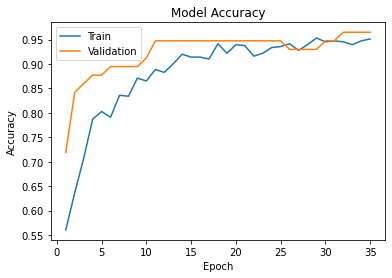

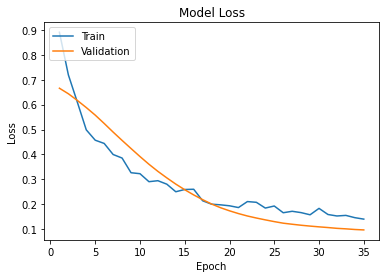

In [53]:
create_Learning_Curve(history,35)

In [ ]:
#Thanks